# Сборный проект

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Изучение данных из файлов

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sbn
import warnings 
warnings.simplefilter('ignore')

games = pd.read_csv('/datasets/games.csv')
#games = pd.read_csv('games.csv')
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Названия столбцов содержат прописные буквы, необходимо привести их к строчным. Столбец Year_of_Release необходимо привести к целочисленным значениям.



In [2]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Столбец User_Score имеет тип данных object, но содержит данные в виде цифр, необходимо изменить тип данных на float.

In [3]:
# Посмотрим пропуски
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Пропуски обнаружены в следующих столбцах: Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating.

Пропуски в столбцах Name, Genre и Year_of_Releas мы не можем заполнить какими-либо значениями, поэтому, учитывая не значительный процент пропусков(~1.5%), эти строки необходимо удалить.

Пропуски в столбцах Critic_Score, User_Score, Rating мы также не имеем возможности заполнить, тк заполнение средним или медианным значением моджет сильно исказить данные. Поэтому, учитывая значительный процент пропусков (~ от 40% до 51%), эти данные оставим без изменения.

In [4]:
games['User_Score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.3       2
0.2       2
2.3       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

В столбце User_Score достаточно большой процент данных занимает аббревиатура 'tbd'. Она означает to be defined (предстоит определить). Нужно будет заменить его пропусками.


### Вывод

Основные проблемы в данных выявлены, далее займемся их обработкой, приведем названия столбцов к нижнему регистру, изменим типы данных, удалим пропущенные значения, заменим не определенные значения на пропуски.

## Предобработка данных

In [5]:
# Приведем названия всех столбцов к нижнему регистру:
games = games.rename(columns={'Name':'name',
                              'Platform':'platform', 
                              'Year_of_Release':'year_of_release', 
                              'Genre':'genre',
                              'NA_sales':'na_sales',
                              'EU_sales':'eu_sales',
                              'JP_sales':'jp_sales',
                              'Other_sales':'other_sales',
                              'Critic_Score':'critic_score', 
                              'User_Score':'user_score',
                              'Rating':'rating'})
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# Удалим строки с пропущенными значениями в столбце name, genre и year_of_release методом .dropna():
games = games.dropna(subset=['name', 'genre', 'year_of_release']) 
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [7]:
# Заменим тип данных в столбце year_of_release на int:
games['year_of_release'] = games['year_of_release'].astype('int')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [8]:
# Заменим tbd на пропуски:
games.loc[games['user_score'] == 'tbd', 'user_score'] = float('NaN')
# Изменим тип данных в столбце user_score:
games['user_score'] = games['user_score'].astype(float)
games['user_score'].value_counts()

7.8    322
8.0    285
8.2    276
8.3    252
7.5    249
      ... 
9.6      2
0.6      2
1.9      2
9.7      1
0.0      1
Name: user_score, Length: 95, dtype: int64

In [9]:
# Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:
games['sum_sales'] = games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
games


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


### Вывод

Проведена предобработка данных: названия столбцов приведены к нижнему регистру, изменены типы данных, удалены пропущенные значения, не определенные значения заменены на пропуски, добавлен столбец с суммарными продажами. Данные обработаны и подготовлены к дальнейшему анализу.

## Исследовательский анализ данных

*Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?*

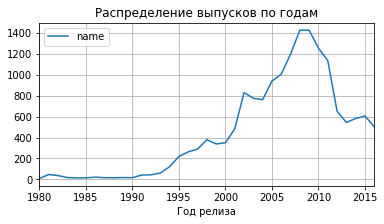

In [10]:
# Объединим данные по годам, чтобы посмотреть количество выпусков:
games_pivot = games.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(grid=True, figsize=(6, 3))
plt.title('Распределение выпусков по годам')
plt.xlabel('Год релиза')
plt.legend()
plt.show();


Самые пиковые годы по выпускам 2008-2009. В целом до 2008 идет прирост выпусков, после 2009 спад. Также наибольшее количество выпусков пришлось на 2006-2011 гг.(более 1000).   

До 1994 года количество выпусков было крайне мало и не поднималось выше 100. Начиная же с 1994 выпуски начали расти и не имели снижения фактически до 2008 года.

*Посмотрите, как менялись продажи по платформам.
Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 
За какой характерный срок появляются новые и исчезают старые платформы?*

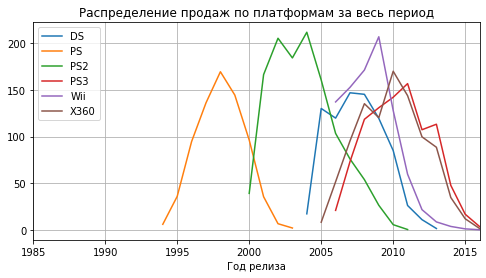

In [11]:
# Выберем платформы с наибольшими суммарными продажами:
platform_top = games.groupby('platform').agg({'sum_sales' : 'sum'}).sort_values(by='sum_sales').tail(6).index

# Постройм распределение по годам:
games.query('platform in @ platform_top').pivot_table(index='year_of_release', columns='platform', 
                                                      values='sum_sales', aggfunc='sum').plot(grid=True, figsize=(8, 4));
plt.title('Распределение продаж по платформам за весь период')
plt.xlabel('Год релиза')
plt.legend()
plt.show();

Мы видим корреляцию с предыдущим графиком по количеству выпусков, резкий рост продаж начинается с 1994 года на платформе PS. Далее ее сменяет PS2, затем, примерно с 2004 года начинают появляться DS, X360, Wii и PS3, которые имеют практически одинаковый срок жизни на одинаковом отрезке времени (2005-2015). 

Самые высокие продажи у платформ PS2 и Wii.

В среднем срок жизни каждой из топ-платформ длится примерно 10 лет. 

*Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.*


In [12]:
# Определим актуальный период для построения прогноза на 2017 год. Возьмем суммарные продажи от 1 млн.:
current_period = games.groupby(['platform', 'year_of_release']).agg({'sum_sales' : 'sum'}).query('sum_sales > 1')
current_period = current_period.reset_index().groupby('platform').agg({'year_of_release' : 'count'}).mean()
current_period



year_of_release    7.92
dtype: float64

Cредний срок жизни платформы составил 7.9 лет, его мы и будем считать актуальным периодом. Но, это достаточно длинный период, за который могет многое поменяться на игровом рынке, и наше исседование будет не актуальным. Если смотреть на график продаж по годам (ниже), начиная с 2009 идет ежегодное стабильное падение продаж до 2016 года. Но если визуально "срезать макушку", то в районе 300 млн. как-будто есть некая стабилизация. Она приходится на период 2012 года. В этом случае актуальный период составит 5 лет. Возьмем его для дальнейшего анализа.

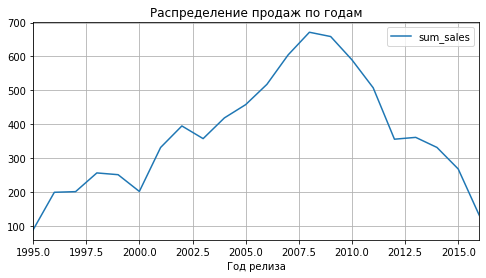

In [13]:
games.pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').query('year_of_release > 1994').plot(grid=True, figsize=(8, 4));
plt.title('Распределение продаж по годам')
plt.xlabel('Год релиза')
plt.legend()
plt.show();

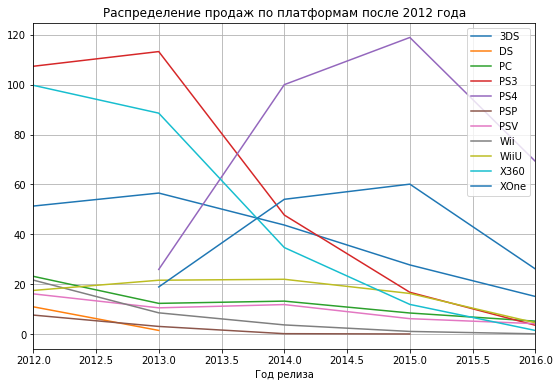

In [14]:
# Определим какие платформы лидируют по продажам начиная с 2012 года:
games_actual_period = games.loc[games ['year_of_release'] >= 2012]
global_sales = games_actual_period.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')
global_sales.plot(grid=True, figsize=(9, 6)); 
plt.title('Распределение продаж по платформам после 2012 года')
plt.xlabel('Год релиза')
plt.legend()
plt.show();

По продажам лидируют следущие платформы: PS4, PS3, X360, 3DS, XOne.

Лидеры немного поменялись по сравнению с рейтингом за все годы. 

Остались неизменными PS3, X360. 

Добавились 3DS, PS4, XOne. 

PS и PS2, Wii, DS 'отжили' свое и покинули рынок.

In [15]:
# Выберем топ платформ за актуальный период(с 2012 года):
platform_top_actual_period = games_actual_period.groupby('platform').agg({'sum_sales' : 
                                                                          'sum'}).sort_values(by='sum_sales').tail(5)
print (platform_top_actual_period)
platform_top_actual_period = platform_top_actual_period.index

          sum_sales
platform           
XOne         159.32
3DS          194.61
X360         236.54
PS3          288.79
PS4          314.14


*Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.*

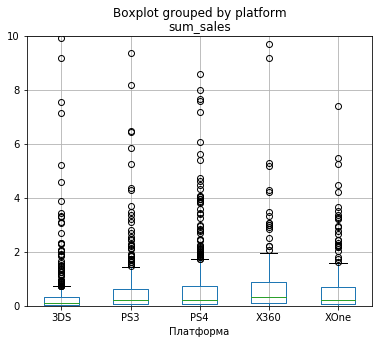

In [17]:
#Построим "ящик с усами" по продажам по топ-платформам после 2012 года:
games_actual_period.query('platform in @platform_top_actual_period').boxplot(column='sum_sales', 
                                                                             by='platform', 
                                                                             figsize=(6,5));
plt.ylim(0,10)
plt.xlabel('Платформа')
plt.show()

Выбросы у всех платформ достаточно велики, немногим меньше у X360. Это значит, что игры продаются не равномерно, это может быть зависимость от региона, возможно в каком-то регионе пользуется высоким спросом какая-то одна из этих игр (например как 3DS в Японии).
Еще это могут быть какие-то популярные игры. Посмотрим на 3DS. Маленький ящик и много выбросов. Это говорит о том, что большАя часть объема продаж делается за счет этих выбросов. В то же время у XOne ситуация иная: большой бокс, длинный ус и мало выбросов. Это свидетельствует о том, что на XOne покупают самые разные игры, причем, в немалом количестве.

*Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.*


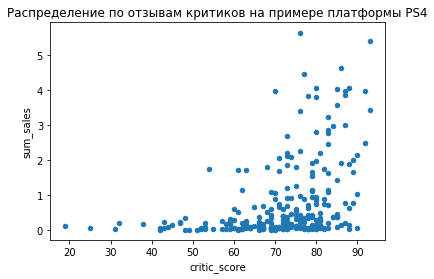

In [18]:
# Построим диаграмму зависимости продаж от отзывов критиков на примере платформы PS4, отбросим выбросы:
games_actual_period[
    (games_actual_period['platform'] == 'PS4') & 
    (games_actual_period['critic_score'] >0) & 
    (games_actual_period['sum_sales'] < games_actual_period['sum_sales'].quantile(0.99))].plot(kind='scatter', 
                                                                                               x='critic_score', 
                                                                                               y='sum_sales', 
                                                                                               figsize=(6,4));
plt.title('Распределение по отзывам критиков на примере платформы PS4')
plt.show();

На диаграмме видна небольшая зависимость продаж от отзывов критиков.

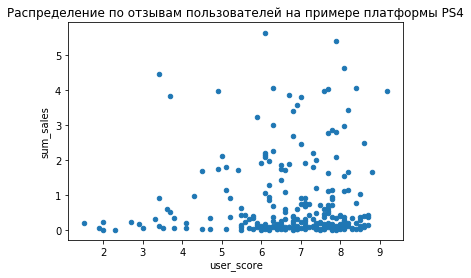

In [19]:
# Построим диаграмму зависимости продаж от отзывов пользователей на примере платформы PS4, отбросим выбросы:
games_actual_period[
    (games_actual_period['platform'] == 'PS4') & 
    (games_actual_period['user_score'] >0) & 
    (games_actual_period['sum_sales'] < games_actual_period['sum_sales'].quantile(0.99))].plot(kind='scatter', 
                                                                                               x='user_score', 
                                                                                               y='sum_sales', 
                                                                                               figsize=(6,4));
plt.title('Распределение по отзывам пользователей на примере платформы PS4')
plt.show();

Практически не видна зависимость от отзывов пользователей.


In [20]:
#Посмотрим зависимость продаж от отзывов критиков и пользователей при помощи корреляции Пирсона на примере платформы PS4:
games_actual_period[games_actual_period['platform'] == 'PS4'][['sum_sales', 'user_score', 'critic_score']].corr()

,sum_sales,user_score,critic_score
sum_sales,1.000000,-0.031957,0.406568
user_score,-0.031957,1.000000,0.557654
critic_score,0.406568,0.557654,1.000000


Корреляция продаж с отзывами пользователей отсутствует. Это значит, что отзывы пользователей не имеют влияния на продажи игр.

Корреляция продаж с отзывами критиков умеренная. Это значит, что критики имеют некоторое влияние на продажи игр.

*Соотнесите выводы с продажами игр на других платформах.*

In [21]:
# Посмотрим также корреляцию по остальным 4-м топ-платформам в общем:
games_actual_period[games_actual_period['platform'] != 'PS4'].query('platform in @platform_top_actual_period')[['sum_sales', 'user_score', 'critic_score']].corr()

,sum_sales,user_score,critic_score
sum_sales,1.000000,0.008680,0.339684
user_score,0.008680,1.000000,0.535459
critic_score,0.339684,0.535459,1.000000


Существенной разницы между платформой PS4 и остальными топ-платформами  не обнаружено. Во всех платформах зависимость продаж от пользователей практически отсутствует, а от отзывов критиков умеренная.

*Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?*

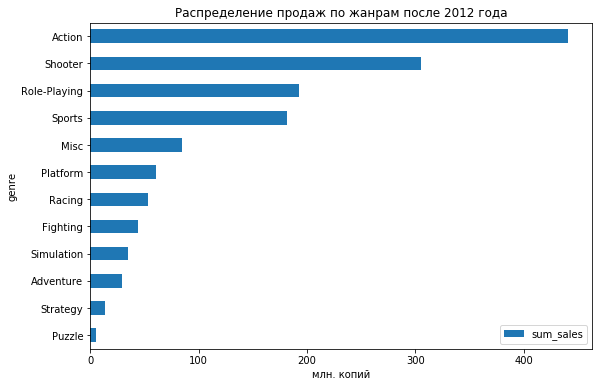

In [22]:
# Определим какие жанры лидируют по суммарным продажам начиная с 2012 года:
games_actual_period.groupby('genre').agg({'sum_sales' : 'sum'}). sort_values(by='sum_sales').plot(kind='barh', figsize=(9, 6));
plt.title('Распределение продаж по жанрам после 2012 года')
plt.xlabel('млн. копий')
plt.show();

Жанры-лидеры: Action, Shooter, Role-Playing и Sports.

Жанры-аутсайдеры - Adventure,  Strategy и Puzzle.

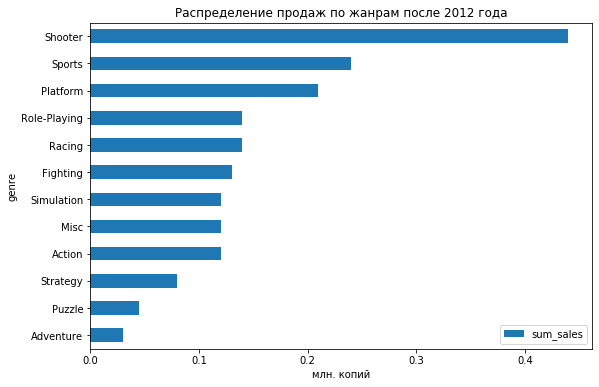

In [23]:
# Определим какие жанры лидируют по медианным продажам начиная с 2012 года:
games_actual_period.groupby('genre').agg({'sum_sales' : 'median'}). sort_values(by='sum_sales').plot(kind='barh', figsize=(9, 6));
plt.title('Распределение продаж по жанрам после 2012 года')
plt.xlabel('млн. копий')
plt.show();

Жанры-лидеры - Shooter, Sports, Platform.

Жанры-аутсайдеры - Strategy, Puzzle и Adventure.

### Вывод

Мы выявили, что самый пик по количеству выпусков игр был в 2008-2009гг., с 1994 по 2008 год был резкий рост, а с 2009 по 2016 резкий спад. Также определены платформы-лидеры по объемам продаж, это - PS, PS2, DS, X360, Wii и PS3, которые имеют средний срок "жизни" 10 лет. 

Для построения прогноза на 2017 год мы взяли срок 5 лет, начиная с 2012. В течение этого срока лидерами были PS4, PS3, X360, 3DS и XOne. Но надо отметить, что PS3, X360 и 3DS к 2016 году сильно потеряли в продажах и по сути покинули рынок.      

Выявили высокий уровень выбросов у всех платформ, немногим меньше у X360. Это значит, что игры продаются не равномерно, это может быть зависимость от региона, возможно в каком-то регионе пользуется высоким спросом какая-то одна из этих игр (например как 3DS в Японии).

Также мы определили отсутствие корреляции продаж с отзывами пользователей, но есть умеренная корреляция с отзывами критиков. 

Также были определены самые популярные жанры: по суммарным продажам - Action, Shooter, Sports и Role-Playing. И по медианным продажам - Shooter, Sports, Platform. как мы видим Action сильно снизился в ретинге, это связано с темБ что Action далает продажи за счет большого количества выпускаемых игр.



## Портрет пользователя каждого региона


*Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?*

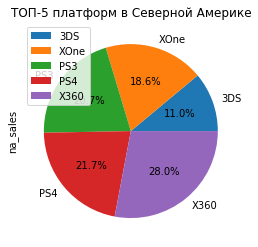

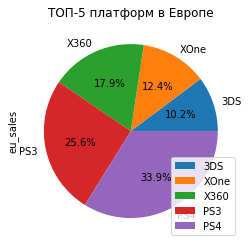

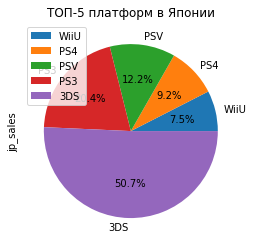

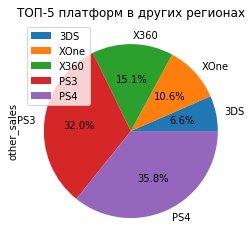

In [24]:
# Определим самые популярные платформы в каждом регионе:
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
for region in regions:
    genre = games_actual_period.groupby('platform').agg({region : 'sum'}).sort_values(by=region).tail(5).plot(y=region, kind='pie',  autopct='%1.1F%%');
    if region == 'na_sales':
        plt.title('ТОП-5 платформ в Северной Америке')
    if region == 'eu_sales':
        plt.title('ТОП-5 платформ в Европе')
    if region == 'jp_sales':
        plt.title('ТОП-5 платформ в Японии')
    if region == 'other_sales':
        plt.title('ТОП-5 платформ в других регионах')   
    plt.show();

PS4 популярна в каждом регионе, имеет долю ~22%-36% и занимает 1-2 место, кроме Японии, там она 4-ом месте с 9.2%. 

PS3 - присутсвует в топ-рейтинге во всех регионах. Везде занимает 2-е место и имеет долю продаж около 25%.

Х360 также популярна во всех регионах, кроме Японии (не вошла в рейтинг). Является лидером по продажам в Америке (доля ~28%). 

3DS - является лидером по продажам в Японии (доля ~50%), в остальных регионах находится на 5-ом месте с долей около 9%.

XOne - находится на 4-м месте по всем регионам с долей ~14, кроме Японии (не вошла в рейтинг).

Во всех регионах, кроме японии все вышеперечисленные игры вошли в рейтинг, только с разницей в долях. Что полностью совпадает с рейтингом по топ-платформам, сформированном ранее. Японский же рейтинг отличается крайне большой долей 3DS (доля в 5 раз больше), а также наличием 2-х не самых популярных в целом игр PSV (доля 12.2%) и WiiU (доля 7.5%). Похоже, что японцы больше любят портативные консоли и родной рынок. 

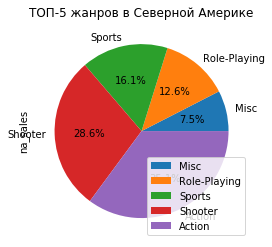

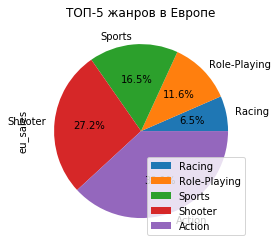

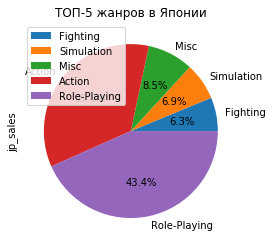

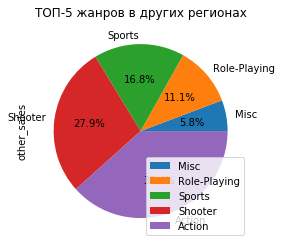

In [25]:
# Определим самые популярные жанры в каждом регионе:
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
for region in regions:
    genre = games_actual_period.groupby('genre').agg({region : 'sum'}).sort_values(by=region).tail(5).plot(y=region, kind='pie',  autopct='%1.1F%%');
    if region == 'na_sales':
        plt.title('ТОП-5 жанров в Северной Америке')
    if region == 'eu_sales':
        plt.title('ТОП-5 жанров в Европе')
    if region == 'jp_sales':
        plt.title('ТОП-5 жанров в Японии')
    if region == 'other_sales':
        plt.title('ТОП-5 жанров в других регионах')   
    plt.show();

Жанр Action является лидером во всех регионах, кроме Японии (2-е место), и  везде имеет высокую долю продаж (~35%-38%).

Shooter занимает второе место по доле продаж во всех регионах (доля ~28%), кроме Японии. В рейтинг Японии не вошел.

Sports занимает третье место по доле продаж по всем регионам (доля ~16%), опять же кроме Японии - в рейтинг не вошел. 

Role-Playing - присутствует в топ-рейтинге всех регионов, лидирует в Японии (доля ~43%), в остальных регионах (доля ~11%). 

Misc - присутсвует в топ-рейтинге всех регионов (доля ~7%), кроме Европы, там вместо него Racing с долей 6.5%.

В части жанров Японский рейтинг также отличается от остальных регионов, наличием жанров Simulation (~7%) и Fighting (~6%) и жанром-лидером Role-Playing с долей в 4 раза больше, чем у остальных регионов.

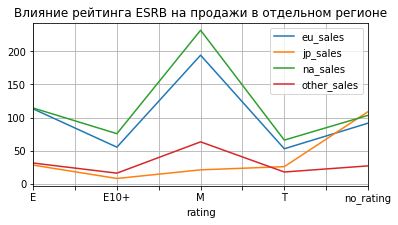

In [26]:
# Заменим пропуски в столбце 'rating' на значение 'no_rating':
games_actual_period.loc[games_actual_period['rating'].isna(), 'rating'] = 'no_rating'

#Влияет ли рейтинг ESRB на продажи в отдельном регионе:
games_actual_period.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum').plot(grid=True, figsize=(6, 3))
plt.title('Влияние рейтинга ESRB на продажи в отдельном регионе')
plt.legend()
plt.show();

Из графика видно, что графики Европы и Америки коррелируется между собой. 

Игры с рейтингом "M" продаются лучше всего Европе и Америке - это игры, предназначенные для взрослых. В других странах они также пользуются популярностью больше всего.

Также в Европе, Америке и других странах пользуется спросом продукция с рейтингом "E" - это игры для всех.

Игры для подростков - "T" и для детей старше 10 длет - "E10+", имеют наименьший спрос.

Также в Европе, Америке и Японии продается много игр с отсутствующим рейтингом , в японии это вообще лидер по продажам.
Скорее всего, дело тут в том, что ESRB работает только на территории США, в Японии есть аналогичная организация: CERO. Я думаю, что, с одной стороны, иностранным играм они (ESRB) не присваивают рейтинги, поскольку на них уже есть маркировка. Чтобы не было конфликта, так сказать. Так что вполне возможно, что часть игр это продукция Японии или же это корейские игры (там тоже своя организация). С другой стороны, раз они продают игры на своем рынке, то присвоение рейтинга может быть обязательным. Значит, дело еще может быть в том, что наша таблица это склейка двух таблиц: продажи на Западе и на Востоке. И именно разница в рынках (восточный и западный) наталкивает на мысль о неслучайности пропусков.

### Вывод

Проанализировав рейтинги по популярным платформам и жанрам в разных регионах, выявилось, что рейтинг Японии сильно отличается от рейтинга остальных регионов, где, в основном, предпочтения игроков схожи. 

## Проверка гипотез

*Проверьте гипотезы*

*- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;*

*- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.*

*Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.*

Для проверки гипотез выберем метод о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2,equal_var).

Проверим первую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    
Нулевую гипотизу сформулируем так: средние пользовательские рейтинги платформ Xbox One и PC одинаковые, 
альтернативную - средние пользовательские рейтинги платформ Xbox One и PC разные. 

In [27]:
# Перед проверкой удалим пропуски в столбце user_score, для корректности проведения ttest:
games_actual_period = games_actual_period.dropna(subset=['user_score']) 
games_actual_period.isna().sum()

name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       234
user_score           0
rating               0
sum_sales            0
dtype: int64

In [28]:
# Проверим первую гипотезу:
pc= games_actual_period[games_actual_period['platform'] == 'PC']['user_score']
xone = games_actual_period[games_actual_period['platform'] == 'XOne']['user_score']

alpha = 0.05 

results = st.ttest_ind(xone, pc, equal_var=False) 

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, значит средние пользовательские рейтинги платформ XOne и PC одинаковые.

Проверим вторую гипотезу: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    
Нулевую гипотизу сформулируем так: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные, 

альтернативную - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые. 

In [29]:
# Проверим вторую гипотезу:
action = games_actual_period[games_actual_period['genre'] == 'Action']['user_score']
sports = games_actual_period[games_actual_period['genre'] == 'Sports']['user_score']

alpha = 0.05

results = st.ttest_ind(action, sports, equal_var=False) 

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  4.24307776572644e-20
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, значит средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

### Вывод

Статистический тест показал, что средние пользовательские рейтинги платформ Xbox One и PC, а также средние пользовательские рейтинги жанров Action и Sports одинаковые.

## Общий вывод

По итогам проведенного исследования, выявлены следущие закономерности:

Начиная с 2009 года количество выпускаемых игр и их продажи идут на спад. Мы определили актуальный период в 5 лет, и в течение этого периода популярными были следущие платформы: PS4, PS3, X360, 3DS и XOne. 

В разрезе по регионам картина немного иная, Япония сильно выбивается из общей картины, поэтому, определяя потенциально успешный продукт, я бы не ориентировалась на их рынок, тк, возможно, в Японии есть свои родные игровые платформы, или портативные консоли, которые не вошли в нашу выборку. Итак, самыми популярные платформы в Америке, Европе и других регионах совпадают с общим рейтингом.

Самыми популярными жанрами являются Action, Shooter, Sports, Role-Playing и Misc. ТОП-жанры совпали с выборкой в разрезе регионов. В Японии рейтинг отличается от остальных регионов, наличием жанров Simulation (~7%) и Fighting (~6%) и жанром-лидером Role-Playing с долей в 4 раза больше, чем у остальных регионов.

Выявили высокий уровень выбросов у всех платформ, немногим меньше у X360. Это значит, что игры продаются не равномерно, это может быть зависимость от региона, возможно в каком-то регионе пользуется высоким спросом какая-то одна из этих игр (например как 3DS в Японии).

Корреляция продаж с отзывами пользователей практически отсутствует. Это значит, что отзывы пользователей не имеют влияния на продажи игр.
Корреляция продаж с отзывами критиков умеренная. Это значит, что критики имеют некоторое влияние на продажи игр.

Лучше всего во всех странах продаются игры предназначенные для взрослых. Также пользуются спросом игры для всех. Самый низкий спрос на игры для подростков и детей от 10 лет. Большую долю имеют игры с отсутсвующим возрастным рейтингом, из чего можно сделать вывод, что он не имеет сильного влияния на продажи.
